In [1]:
# while we established that recurrent out performs FF when aggregated over some models,
# we want to make sure this is also the case when evaluating individual models.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from IPython.display import display

In [4]:
from os.path import join

from thesis_v2 import dir_dict
import pandas as pd

from thesis_v2.plots.main_results import main_loop
from thesis_v2.plots.main_results_tables import get_perf_over_cls_data


f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'main_result.pkl')


dir_plot_key = join('yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2+20201001+20201012')

In [5]:
f_main_result_2 = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201001', 'main_result.pkl')
f_main_result_3 = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201012', 'main_result.pkl')

In [6]:
df_main_result = pd.read_pickle(f_main_result)
assert df_main_result.index.is_unique
df_main_result_2 = pd.read_pickle(f_main_result_2)
assert df_main_result.index.is_unique
df_main_result_3 = pd.read_pickle(f_main_result_3)
assert df_main_result_3.index.is_unique

In [7]:
# concatenate
df_main_result = pd.concat(
[
    df_main_result,
    df_main_result_2,
    df_main_result_3,
], axis=0
)

In [8]:
def disp(dummy):
    pass

In [9]:
from thesis_v2.plots.basic import scatter

ff vs different cls, cc2_normed_avg_mean
ff vs different cls, cc2_normed_avg_sem
ff vs different cls, cc2_raw_avg_mean
ff vs different cls, cc2_raw_avg_sem
ff vs different cls, cc_raw_avg_mean
ff vs different cls, cc_raw_avg_sem
ff vs different cls, num_param_mean
ff vs different cls, num_param_sem


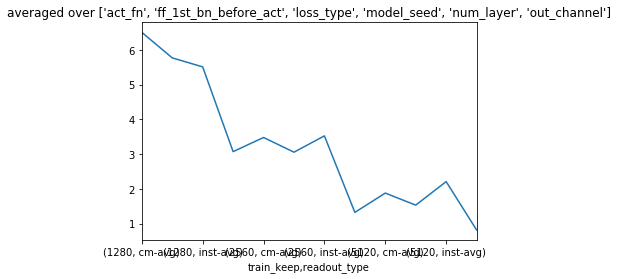

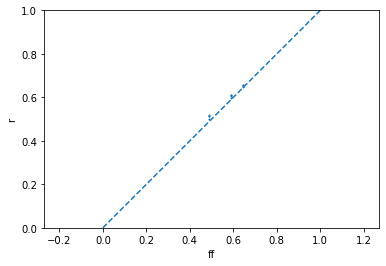

ff vs different cls, cc2_normed_avg_mean
ff vs different cls, cc2_normed_avg_sem
ff vs different cls, cc2_raw_avg_mean
ff vs different cls, cc2_raw_avg_sem
ff vs different cls, cc_raw_avg_mean
ff vs different cls, cc_raw_avg_sem
ff vs different cls, num_param_mean
ff vs different cls, num_param_sem


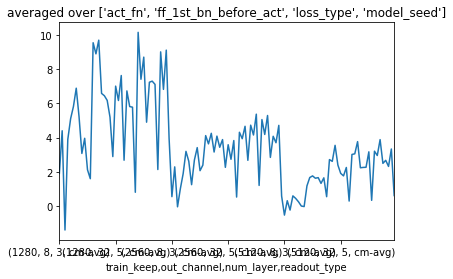

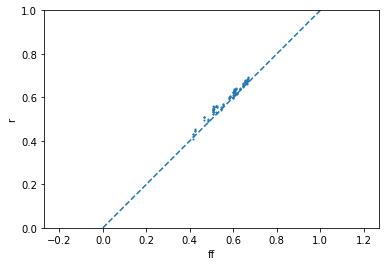

ff vs different cls, cc2_normed_avg_mean
ff vs different cls, cc2_normed_avg_sem
ff vs different cls, cc2_raw_avg_mean
ff vs different cls, cc2_raw_avg_sem
ff vs different cls, cc_raw_avg_mean
ff vs different cls, cc_raw_avg_sem
ff vs different cls, num_param_mean
ff vs different cls, num_param_sem


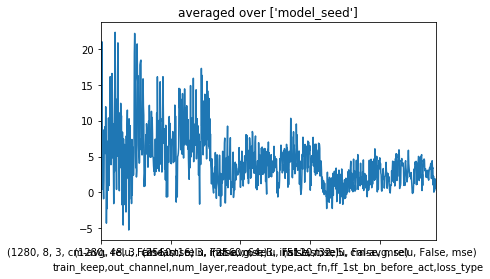

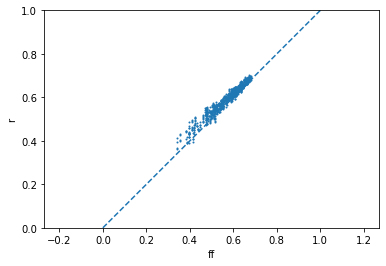

In [10]:
for axes_to_reduce in [
    ['act_fn', 'ff_1st_bn_before_act', 'loss_type', 'model_seed',
                                               'num_layer', 'out_channel'],
    ['act_fn', 'ff_1st_bn_before_act', 'loss_type', 'model_seed'],
    ['model_seed']
]:
    overall_result = get_perf_over_cls_data(
    df_main_result, max_cls=7, display=disp,
                               axes_to_reduce=axes_to_reduce
)
    plt.close('all')
    overall_result['cc2_normed_avg_mean']['max gain %'].plot(title=f'averaged over {axes_to_reduce}')
    plt.show()
    
    plt.close('all')
    values_r = overall_result['cc2_normed_avg_mean']['best r'].values
    values_ff = overall_result['cc2_normed_avg_mean']['ff'].values
    fig, ax = plt.subplots(squeeze=True);
    scatter(ax, values_ff, values_r, 'ff', 'r')
    plt.show()